In [1]:
import pandas

elections = pandas.read_csv ("1976-2020-president.csv")
print (elections.dtypes)

elections_short = elections.drop(["state_po", "state_fips","office", "state_cen", "state_ic","party_detailed", "writein", "version", "notes"],axis=1)

year                  int64
state                object
state_po             object
state_fips            int64
state_cen             int64
state_ic              int64
office               object
candidate            object
party_detailed       object
writein              object
candidatevotes        int64
totalvotes            int64
version               int64
notes               float64
party_simplified     object
dtype: object


Urči pořadí jednotlivých kandidátů v jednotlivých státech a v jednotlivých letech (pomocí metody rank()). 
Nezapomeň, že data je před použitím metody nutné seřadit a spolu s metodou rank() je nutné použít metodu groupby().

In [2]:
elections_short["Rank"] = elections_short.groupby(["state", "year"])["candidatevotes"].rank(method="min", ascending=False)
print (elections_short.head(20))

    year     state                  candidate  candidatevotes  totalvotes  \
0   1976   ALABAMA              CARTER, JIMMY          659170     1182850   
1   1976   ALABAMA               FORD, GERALD          504070     1182850   
2   1976   ALABAMA             MADDOX, LESTER            9198     1182850   
3   1976   ALABAMA    BUBAR, BENJAMIN ""BEN""            6669     1182850   
4   1976   ALABAMA                  HALL, GUS            1954     1182850   
5   1976   ALABAMA            MACBRIDE, ROGER            1481     1182850   
6   1976   ALABAMA                        NaN             308     1182850   
7   1976    ALASKA               FORD, GERALD           71555      123574   
8   1976    ALASKA              CARTER, JIMMY           44058      123574   
9   1976    ALASKA            MACBRIDE, ROGER            6785      123574   
10  1976    ALASKA                        NaN            1176      123574   
11  1976   ARIZONA               FORD, GERALD          418642      742719   

Pro další analýzu jsou důležití pouze vítězové. Vytvoř novou tabulku, která bude obsahovat pouze vítěze voleb.

In [3]:
print(elections_short.dtypes)
election_winners = elections_short[elections_short["Rank"] == 1.0]
print(election_winners.head())

year                  int64
state                object
candidate            object
candidatevotes        int64
totalvotes            int64
party_simplified     object
Rank                float64
dtype: object
    year       state      candidate  candidatevotes  totalvotes  \
0   1976     ALABAMA  CARTER, JIMMY          659170     1182850   
7   1976      ALASKA   FORD, GERALD           71555      123574   
11  1976     ARIZONA   FORD, GERALD          418642      742719   
19  1976    ARKANSAS  CARTER, JIMMY          498604      767535   
23  1976  CALIFORNIA   FORD, GERALD         3882244     7803770   

   party_simplified  Rank  
0          DEMOCRAT   1.0  
7        REPUBLICAN   1.0  
11       REPUBLICAN   1.0  
19         DEMOCRAT   1.0  
23       REPUBLICAN   1.0  


Pomocí metody shift() přidej nový sloupec, abys v jednotlivých řádcích měl(a) po sobě 
vítězné strany ve dvou po sobě jdoucích letech.

In [4]:

election_winners ["previous_winner_party"] =election_winners["party_simplified"].shift(periods=1)
print(election_winners.head(10))

print(election_winners.dtypes)

    year                 state      candidate  candidatevotes  totalvotes  \
0   1976               ALABAMA  CARTER, JIMMY          659170     1182850   
7   1976                ALASKA   FORD, GERALD           71555      123574   
11  1976               ARIZONA   FORD, GERALD          418642      742719   
19  1976              ARKANSAS  CARTER, JIMMY          498604      767535   
23  1976            CALIFORNIA   FORD, GERALD         3882244     7803770   
30  1976              COLORADO   FORD, GERALD          584278     1081440   
38  1976           CONNECTICUT   FORD, GERALD          719261     1386355   
43  1976              DELAWARE  CARTER, JIMMY          122461      235642   
50  1976  DISTRICT OF COLUMBIA  CARTER, JIMMY          137818      168830   
55  1976               FLORIDA  CARTER, JIMMY         1636000     3150631   

   party_simplified  Rank previous_winner_party  
0          DEMOCRAT   1.0                  None  
7        REPUBLICAN   1.0              DEMOCRAT  
11

<ipython-input-4-a4160dfd5273>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_winners ["previous_winner_party"] =election_winners["party_simplified"].shift(periods=1)


Porovnej, jestli se ve dvou po sobě jdoucích letech změnila vítězná strana. Můžeš k tomu použít např. 
funkci numpy.where() nebo metodu apply().

In [5]:
import numpy
election_winners["change"] = numpy.where(election_winners["party_simplified"] != election_winners["previous_winner_party"],1,0)
print(election_winners.head())

    year       state      candidate  candidatevotes  totalvotes  \
0   1976     ALABAMA  CARTER, JIMMY          659170     1182850   
7   1976      ALASKA   FORD, GERALD           71555      123574   
11  1976     ARIZONA   FORD, GERALD          418642      742719   
19  1976    ARKANSAS  CARTER, JIMMY          498604      767535   
23  1976  CALIFORNIA   FORD, GERALD         3882244     7803770   

   party_simplified  Rank previous_winner_party  change  
0          DEMOCRAT   1.0                  None       1  
7        REPUBLICAN   1.0              DEMOCRAT       1  
11       REPUBLICAN   1.0            REPUBLICAN       0  
19         DEMOCRAT   1.0            REPUBLICAN       1  
23       REPUBLICAN   1.0              DEMOCRAT       1  


<ipython-input-5-efe9458aa9d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_winners["change"] = numpy.where(election_winners["party_simplified"] != election_winners["previous_winner_party"],1,0)


Proveď agregaci podle názvu státu a seřaď státy podle počtu změn vítězných stran.

In [6]:
election_winners_grouped = election_winners.groupby(["state"])["change"].sum()
election_winners_grouped = pandas.DataFrame(election_winners_grouped)
election_winners_grouped = election_winners_grouped.sort_values("change", ascending=False)

print(election_winners_grouped.head(10))

                change
state                 
MISSISSIPPI         11
IDAHO               11
SOUTH CAROLINA      10
WYOMING              9
NORTH CAROLINA       9
OREGON               9
ILLINOIS             8
FLORIDA              8
WEST VIRGINIA        8
VERMONT              8


Vytvoř sloupcový graf s 10 státy, kde došlo k nejčastější změně vítězné strany. Jako výšku sloupce nastav počet změn.

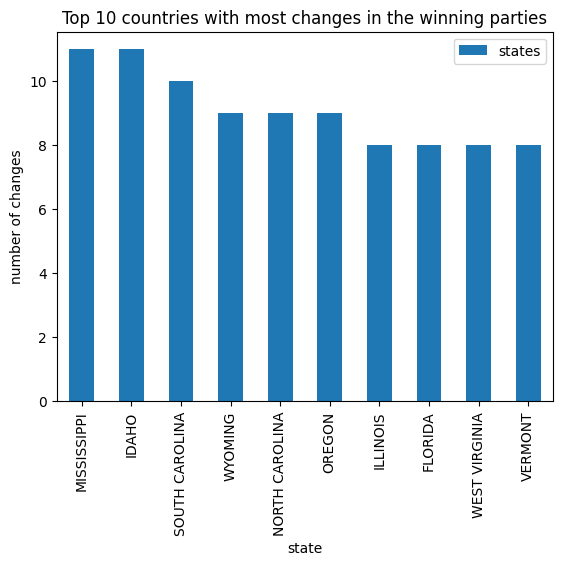

In [7]:
import matplotlib.pyplot as plt
election_winners_grouped.head(10).plot (kind="bar", title="Top 10 countries with most changes in the winning parties")
plt.legend(["states", "Number of changes of the winning party trough the years"])
plt.xlabel("state")
plt.ylabel("number of changes")
plt.show()

Přidej do tabulky sloupec, který obsahuje absolutní rozdíl mezi vítězem a druhým v pořadí.

In [8]:
election_winners_second = elections_short[elections_short["Rank"] <= 2.0]
print (election_winners_second.head())
election_winners ["second_can_votes"] =elections_short["candidatevotes"].shift(periods=-1)
print (election_winners.head())
election_winners ["difference"] = election_winners["candidatevotes"] - election_winners["second_can_votes"]
print(election_winners.head(10))

    year    state      candidate  candidatevotes  totalvotes party_simplified  \
0   1976  ALABAMA  CARTER, JIMMY          659170     1182850         DEMOCRAT   
1   1976  ALABAMA   FORD, GERALD          504070     1182850       REPUBLICAN   
7   1976   ALASKA   FORD, GERALD           71555      123574       REPUBLICAN   
8   1976   ALASKA  CARTER, JIMMY           44058      123574         DEMOCRAT   
11  1976  ARIZONA   FORD, GERALD          418642      742719       REPUBLICAN   

    Rank  
0    1.0  
1    2.0  
7    1.0  
8    2.0  
11   1.0  
    year       state      candidate  candidatevotes  totalvotes  \
0   1976     ALABAMA  CARTER, JIMMY          659170     1182850   
7   1976      ALASKA   FORD, GERALD           71555      123574   
11  1976     ARIZONA   FORD, GERALD          418642      742719   
19  1976    ARKANSAS  CARTER, JIMMY          498604      767535   
23  1976  CALIFORNIA   FORD, GERALD         3882244     7803770   

   party_simplified  Rank previous_winner_pa

<ipython-input-8-70b24ff21b23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_winners ["second_can_votes"] =elections_short["candidatevotes"].shift(periods=-1)
<ipython-input-8-70b24ff21b23>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_winners ["difference"] = election_winners["candidatevotes"] - election_winners["second_can_votes"]


Přidej sloupec s relativním marginem, tj. rozdílem vyděleným počtem hlasů.

In [9]:
election_winners["margines"] = election_winners["difference"] / election_winners["totalvotes"]
print(election_winners.head())

    year       state      candidate  candidatevotes  totalvotes  \
0   1976     ALABAMA  CARTER, JIMMY          659170     1182850   
7   1976      ALASKA   FORD, GERALD           71555      123574   
11  1976     ARIZONA   FORD, GERALD          418642      742719   
19  1976    ARKANSAS  CARTER, JIMMY          498604      767535   
23  1976  CALIFORNIA   FORD, GERALD         3882244     7803770   

   party_simplified  Rank previous_winner_party  change  second_can_votes  \
0          DEMOCRAT   1.0                  None       1          504070.0   
7        REPUBLICAN   1.0              DEMOCRAT       1           44058.0   
11       REPUBLICAN   1.0            REPUBLICAN       0          295602.0   
19         DEMOCRAT   1.0            REPUBLICAN       1          267903.0   
23       REPUBLICAN   1.0              DEMOCRAT       1         3742284.0   

    difference  margines  
0     155100.0  0.131124  
7      27497.0  0.222514  
11    123040.0  0.165662  
19    230701.0  0.300574  

<ipython-input-9-aa0a86209b56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_winners["margines"] = election_winners["difference"] / election_winners["totalvotes"]


Seřaď tabulku podle velikosti relativního marginu a zjisti, kdy a ve kterém státě byl výsledek voleb nejtěsnější.

In [10]:
election_winners= election_winners.sort_values("margines", ascending=True)
print(election_winners.head())


      year          state        candidate  candidatevotes  totalvotes  \
2106  2000        FLORIDA  BUSH, GEORGE W.         2912790     5963110   
2266  2000     NEW MEXICO         GORE, AL          286783      598605   
2907  2008       MISSOURI     MCCAIN, JOHN         1445814     2925205   
479   1980  MASSACHUSETTS   REAGAN, RONALD         1057631     2524090   
241   1976         OREGON     FORD, GERALD          492120     1029876   

     party_simplified  Rank previous_winner_party  change  second_can_votes  \
2106       REPUBLICAN   1.0              DEMOCRAT       1         2912253.0   
2266         DEMOCRAT   1.0              DEMOCRAT       0          286417.0   
2907       REPUBLICAN   1.0            REPUBLICAN       0         1441911.0   
479        REPUBLICAN   1.0              DEMOCRAT       1         1053802.0   
241        REPUBLICAN   1.0            REPUBLICAN       0          490407.0   

      difference  margines  
2106       537.0  0.000090  
2266       366.0  0.00

Vytvoř pivot tabulku, která zobrazí pro jednotlivé volební roky, kolik států přešlo od Republikánské strany k Demokratické straně, kolik států přešlo od Demokratické strany k Republikánské straně a kolik států volilo kandidáta stejné strany.

In [11]:
def swing (row):
    row = row.iloc[2:]
    if row["party_simplified"] == "REPUBLICAN" and row ["previous_winner_party"]!="REPUBLICAN":
        return "to Rep."
    else:
        return "no swing"

election_winners["swing"] = election_winners.apply(swing, axis=1)
print(election_winners.head())

election_winners_pivot = pandas.pivot_table(data=election_winners,values="swing", index="year", columns=["previous_winner_party","party_simplified"])
print(election_winners_pivot.head())

      year          state        candidate  candidatevotes  totalvotes  \
2106  2000        FLORIDA  BUSH, GEORGE W.         2912790     5963110   
2266  2000     NEW MEXICO         GORE, AL          286783      598605   
2907  2008       MISSOURI     MCCAIN, JOHN         1445814     2925205   
479   1980  MASSACHUSETTS   REAGAN, RONALD         1057631     2524090   
241   1976         OREGON     FORD, GERALD          492120     1029876   

     party_simplified  Rank previous_winner_party  change  second_can_votes  \
2106       REPUBLICAN   1.0              DEMOCRAT       1         2912253.0   
2266         DEMOCRAT   1.0              DEMOCRAT       0          286417.0   
2907       REPUBLICAN   1.0            REPUBLICAN       0         1441911.0   
479        REPUBLICAN   1.0              DEMOCRAT       1         1053802.0   
241        REPUBLICAN   1.0            REPUBLICAN       0          490407.0   

      difference  margines     swing  
2106       537.0  0.000090   to Rep.  
22

<ipython-input-11-a4b02abf8fc5>:11: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  election_winners_pivot = pandas.pivot_table(data=election_winners,values="swing", index="year", columns=["previous_winner_party","party_simplified"])
